## Model Evaluation and Hyperparameter Tuning

1. Obtain unbiased estimates of a model's performance
2. Diagnose the common problems of machine learning algorithms
3. Fine-tune machine learning models
4. Evaluate predictive models using different performance metrics

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'                 
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data',
                  header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Transform the class representation from the original String to integer
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M','B'])

array([1, 0])

In [5]:
# divide the dataset into training and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

In [7]:
pipe_lr.fit(Xtrain,ytrain)
y_pred = pipe_lr.predict(Xtest)
print('Test Accuracy: ', pipe_lr.score(Xtest,ytest))

('Test Accuracy: ', 0.956140350877193)


### K-fold Cross Validation

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(Xtrain, ytrain)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(Xtrain[train], ytrain[train])
    score = pipe_lr.score(Xtrain[test], ytrain[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(ytrain[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X= Xtrain, y=ytrain, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [10]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.014


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=1))

train_size, train_score, test_score = learning_curve(estimator=pipe_lr,
                                                     X=Xtrain,
                                                     y = ytrain,
                                                     train_sizes= np.linspace(0.1,1.0,10),
                                                     cv=10,
                                                     n_jobs=1)

In [12]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

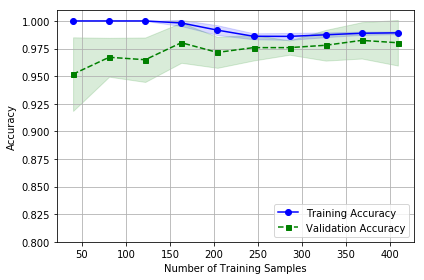

In [13]:
plt.plot(train_size, train_mean, color='blue', marker='o', label='Training Accuracy')

plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_size, test_mean, color='green', linestyle='--', marker= 's', markersize=5, label='Validation Accuracy')

plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.01])
plt.tight_layout()
plt.show();